In [ ]:
!pip install finance-datareader
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 28.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import FinanceDataReader as fdr
from pykrx import stock
import pandas_datareader.data as pdr
import yfinance as yf
from datetime import datetime

**CSV file**

In [ ]:
# 금

gold = pd.read_csv("US_gold.csv", encoding="utf-8")
gold = gold.drop(columns="Unnamed: 0")
gold['Date'] = pd.to_datetime(gold['Date'], format='%Y-%m-%d')
gold["gold"] = gold["gold"].round(2)
gold

,Date,gold
0,2014-01-01,1206.14
1,2014-01-02,1223.48
2,2014-01-03,1236.86
3,2014-01-04,1236.86
4,2014-01-05,1234.33
...,...,...
3281,2022-12-27,1812.37
3282,2022-12-28,1805.94
3283,2022-12-29,1815.18
3284,2022-12-30,1824.44


In [ ]:
gold[gold["Date"].duplicated()]

,Date,gold
1164,2017-03-09,1199.95
1170,2017-03-14,1200.40
1179,2017-03-22,1246.37
1187,2017-03-29,1253.18
1192,2017-04-02,1249.69


In [ ]:
gold = gold.drop_duplicates("Date", keep="last").reset_index(drop=True)
gold

,Date,gold
0,2014-01-01,1206.14
1,2014-01-02,1223.48
2,2014-01-03,1236.86
3,2014-01-04,1236.86
4,2014-01-05,1234.33
...,...,...
3276,2022-12-27,1812.37
3277,2022-12-28,1805.94
3278,2022-12-29,1815.18
3279,2022-12-30,1824.44


In [ ]:
# 원유

oil = pd.read_csv("US_oil.csv", encoding="utf-8")
oil = oil.drop(columns="Unnamed: 0")
oil['Date'] = pd.to_datetime(oil['Date'], format='%Y-%m-%d')
oil["oil"] = oil["oil"].round(2)
oil

,Date,oil
0,2014-01-01,98.68
1,2014-01-02,95.42
2,2014-01-03,94.22
3,2014-01-04,94.22
4,2014-01-05,94.18
...,...,...
3281,2022-12-27,79.75
3282,2022-12-28,78.60
3283,2022-12-29,78.60
3284,2022-12-30,80.46


In [ ]:
oil[oil["Date"].duplicated()]

,Date,oil
1164,2017-03-09,49.56
1170,2017-03-14,48.48
1179,2017-03-22,48.28
1187,2017-03-29,49.57
1192,2017-04-02,50.62


In [ ]:
oil = oil.drop_duplicates("Date", keep="last").reset_index(drop=True)
oil

,Date,oil
0,2014-01-01,98.68
1,2014-01-02,95.42
2,2014-01-03,94.22
3,2014-01-04,94.22
4,2014-01-05,94.18
...,...,...
3276,2022-12-27,79.75
3277,2022-12-28,78.60
3278,2022-12-29,78.60
3279,2022-12-30,80.46


In [ ]:
headlines = pd.read_csv("US_news.csv", encoding="utf-8")
headlines = headlines.drop("Unnamed: 0", axis=1)
headlines

,Date,Headline
0,2014-01-01,De Blasio Draws All Liberal Eyes to New York C...
1,2014-01-02,Boehner Is Said to Back Change on Immigration ...
2,2014-01-03,Qaeda-Aligned Militants Threaten Key Iraqi Cit...
3,2014-01-04,Access to Abortion Falling as States Pass Rest...
4,2014-01-05,New York State Is Set to Loosen Marijuana Laws...
...,...,...
3277,2022-12-27,Retirees Are One Reason the Fed Has Given Up o...
3278,2022-12-28,‘Tragic Battle’: On the Front Lines of China’s...
3279,2022-12-29,U.S. Scrambles to Stop Iran From Providing Dro...
3280,2022-12-30,Russian Missile Barrage Staggers Ukraine’s Air...


In [ ]:
headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3282 non-null   object
 1   Headline  3282 non-null   object
dtypes: object(2)
memory usage: 51.4+ KB


In [ ]:
headlines['Date'] = pd.to_datetime(headlines['Date'])
headlines

,Date,Headline
0,2014-01-01,De Blasio Draws All Liberal Eyes to New York C...
1,2014-01-02,Boehner Is Said to Back Change on Immigration ...
2,2014-01-03,Qaeda-Aligned Militants Threaten Key Iraqi Cit...
3,2014-01-04,Access to Abortion Falling as States Pass Rest...
4,2014-01-05,New York State Is Set to Loosen Marijuana Laws...
...,...,...
3277,2022-12-27,Retirees Are One Reason the Fed Has Given Up o...
3278,2022-12-28,‘Tragic Battle’: On the Front Lines of China’s...
3279,2022-12-29,U.S. Scrambles to Stop Iran From Providing Dro...
3280,2022-12-30,Russian Missile Barrage Staggers Ukraine’s Air...


**API**

In [ ]:
# 채권

bond = fdr.DataReader('GOVT', start="20140101", end="20221231")
bond["bond"] = bond["Close"].round(2)
bond = bond.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
bond.reset_index(inplace=True)
bond

,Date,bond
0,2014-01-02,24.30
1,2014-01-03,24.28
2,2014-01-06,24.33
3,2014-01-07,24.31
4,2014-01-08,24.28
...,...,...
2261,2022-12-23,22.89
2262,2022-12-27,22.76
2263,2022-12-28,22.73
2264,2022-12-29,22.80


In [ ]:
# 환율

cad = fdr.DataReader('CAD=X', start="20140101", end="20221231")
cad["cad"] = cad["Close"].round(2)
cad = cad.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
cad.reset_index(inplace=True)

cny = fdr.DataReader('CNY=X', start="20140101", end="20221231")
cny["cny"] = cny["Close"].round(2)
cny = cny.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
cny.reset_index(inplace=True)

eur = fdr.DataReader('EUR=X', start="20140101", end="20221231")
eur["eur"] = eur["Close"].round(2)
eur = eur.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
eur.reset_index(inplace=True)

jpy = fdr.DataReader('JPY=X', start="20140101", end="20221231")
jpy["jpy"] = jpy["Close"].round(2)
jpy = jpy.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
jpy.reset_index(inplace=True)

mxn = fdr.DataReader('MXN=X', start="20140101", end="20221231")
mxn["mxn"] = mxn["Close"].round(2)
mxn = mxn.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
mxn.reset_index(inplace=True)

In [ ]:
# 산업 ETF

ETF = fdr.DataReader('XLI', start="20140101", end="20221231")
ETF["ETF"] = ETF["Close"].round(2)
ETF = ETF.drop(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
ETF.reset_index(inplace=True)
ETF

,Date,ETF
0,2014-01-02,51.53
1,2014-01-03,51.67
2,2014-01-06,51.37
3,2014-01-07,51.69
4,2014-01-08,51.60
...,...,...
2261,2022-12-23,98.39
2262,2022-12-27,98.69
2263,2022-12-28,97.40
2264,2022-12-29,98.60


In [ ]:
date_range = pd.date_range(start='2014-01-01', end='2022-12-31')
df_dates = pd.DataFrame(date_range, columns=['Date'])

In [ ]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3287 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.8 KB


In [ ]:
df = pd.merge(df_dates, headlines, on="Date", how="left")
df = pd.merge(df,gold, on="Date", how="left")
df = pd.merge(df,oil, on="Date", how="left")
df = pd.merge(df,bond, on="Date", how="left")

df = pd.merge(df,cad, on="Date", how="left")
df = pd.merge(df,cny, on="Date", how="left")
df = pd.merge(df,eur, on="Date", how="left")
df = pd.merge(df,jpy, on="Date", how="left")
df = pd.merge(df,mxn, on="Date", how="left")
df = pd.merge(df,ETF, on="Date", how="left")

df

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
0,2014-01-01,De Blasio Draws All Liberal Eyes to New York C...,1206.14,98.68,NaN,1.06,6.04,0.73,105.30,13.03,NaN
1,2014-01-02,Boehner Is Said to Back Change on Immigration ...,1223.48,95.42,24.30,1.06,6.04,0.73,105.32,13.15,51.53
2,2014-01-03,Qaeda-Aligned Militants Threaten Key Iraqi Cit...,1236.86,94.22,24.28,1.07,6.04,0.73,104.83,13.09,51.67
3,2014-01-04,Access to Abortion Falling as States Pass Rest...,1236.86,94.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-05,New York State Is Set to Loosen Marijuana Laws...,1234.33,94.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3282,2022-12-27,Retirees Are One Reason the Fed Has Given Up o...,1812.37,79.75,22.76,1.36,6.96,0.94,132.76,19.36,98.69
3283,2022-12-28,‘Tragic Battle’: On the Front Lines of China’s...,1805.94,78.60,22.73,1.35,6.96,0.94,133.49,19.46,97.40
3284,2022-12-29,U.S. Scrambles to Stop Iran From Providing Dro...,1815.18,78.60,22.80,1.36,6.98,0.94,134.03,19.42,98.60
3285,2022-12-30,Russian Missile Barrage Staggers Ukraine’s Air...,1824.44,80.46,22.72,1.36,6.96,0.94,132.92,19.46,98.21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3287 non-null   datetime64[ns]
 1   Headline  3282 non-null   object        
 2   gold      3281 non-null   float64       
 3   oil       3281 non-null   float64       
 4   bond      2266 non-null   float64       
 5   cad       2345 non-null   float64       
 6   cny       2344 non-null   float64       
 7   eur       2345 non-null   float64       
 8   jpy       2345 non-null   float64       
 9   mxn       2347 non-null   float64       
 10  ETF       2266 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 282.6+ KB


In [ ]:
df.describe()

,Date,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
count,3287,3281.000000,3281.000000,2266.000000,2345.000000,2344.000000,2345.000000,2345.000000,2347.000000,2266.000000
mean,2018-07-02 00:00:00,1440.865532,62.278586,25.478808,1.280452,6.602248,0.873284,112.809429,18.568027,72.707405
min,2014-01-01 00:00:00,1053.080000,12.880000,22.160000,1.060000,6.030000,0.720000,99.910000,12.840000,48.010000
25%,2016-04-01 12:00:00,1235.100000,47.780000,24.760000,1.260000,6.360000,0.840000,107.280000,17.740000,56.462500
50%,2018-07-02 00:00:00,1313.020000,57.320000,25.250000,1.300000,6.580000,0.880000,110.510000,19.100000,71.955000
75%,2020-09-30 12:00:00,1730.860000,72.540000,26.177500,1.330000,6.870000,0.910000,115.140000,20.090000,82.847500
max,2022-12-31 00:00:00,2070.440000,126.860000,28.300000,1.460000,7.300000,1.040000,150.180000,25.340000,107.120000
std,NaN,265.428866,20.721454,1.150778,0.075875,0.302696,0.059876,9.143910,2.508691,16.690542


In [ ]:
df.to_csv("US_research.csv")

In [ ]:
df.isnull().sum()

Date           0
Headline       5
gold           6
oil            6
bond        1021
cad          942
cny          943
eur          942
jpy          942
mxn          940
ETF         1021
dtype: int64

In [ ]:
df2 = df.copy()
df2 = df2.fillna(method='ffill').dropna()
df2

,Date,Headline,gold,oil,bond,cad,cny,eur,jpy,mxn,ETF
1,2014-01-02,Boehner Is Said to Back Change on Immigration ...,1223.48,95.42,24.30,1.06,6.04,0.73,105.32,13.15,51.53
2,2014-01-03,Qaeda-Aligned Militants Threaten Key Iraqi Cit...,1236.86,94.22,24.28,1.07,6.04,0.73,104.83,13.09,51.67
3,2014-01-04,Access to Abortion Falling as States Pass Rest...,1236.86,94.22,24.28,1.07,6.04,0.73,104.83,13.09,51.67
4,2014-01-05,New York State Is Set to Loosen Marijuana Laws...,1234.33,94.18,24.28,1.07,6.04,0.73,104.83,13.09,51.67
5,2014-01-06,"The Muslim Brotherhood, Back in a Fight to Sur...",1237.73,93.68,24.33,1.06,6.04,0.74,104.91,13.07,51.37
...,...,...,...,...,...,...,...,...,...,...,...
3282,2022-12-27,Retirees Are One Reason the Fed Has Given Up o...,1812.37,79.75,22.76,1.36,6.96,0.94,132.76,19.36,98.69
3283,2022-12-28,‘Tragic Battle’: On the Front Lines of China’s...,1805.94,78.60,22.73,1.35,6.96,0.94,133.49,19.46,97.40
3284,2022-12-29,U.S. Scrambles to Stop Iran From Providing Dro...,1815.18,78.60,22.80,1.36,6.98,0.94,134.03,19.42,98.60
3285,2022-12-30,Russian Missile Barrage Staggers Ukraine’s Air...,1824.44,80.46,22.72,1.36,6.96,0.94,132.92,19.46,98.21


In [ ]:
df2.to_csv("US_research2.csv")

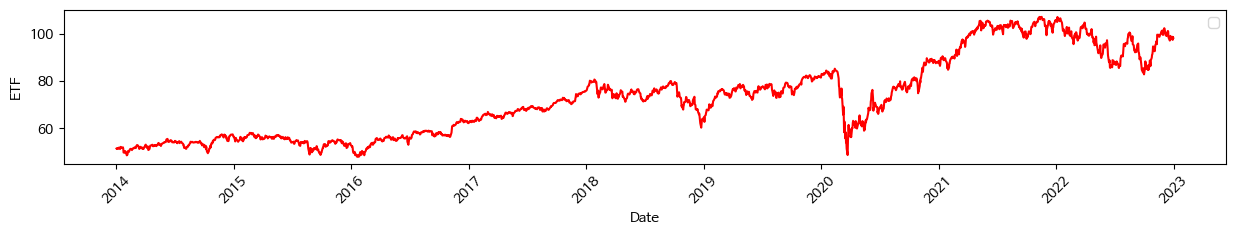

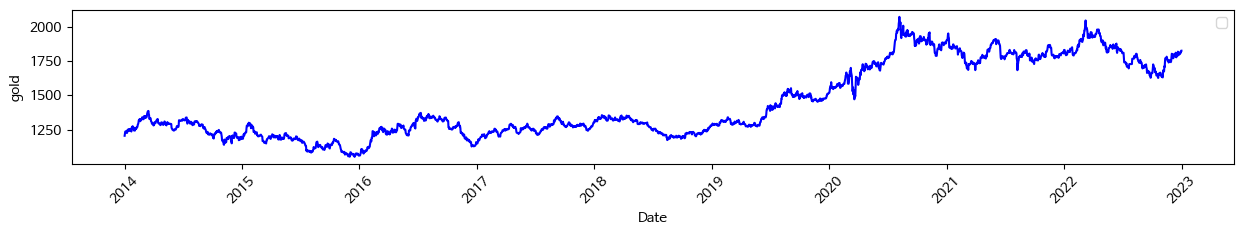

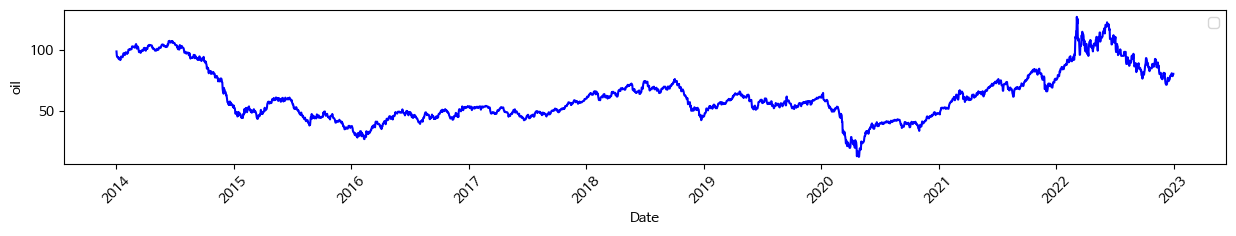

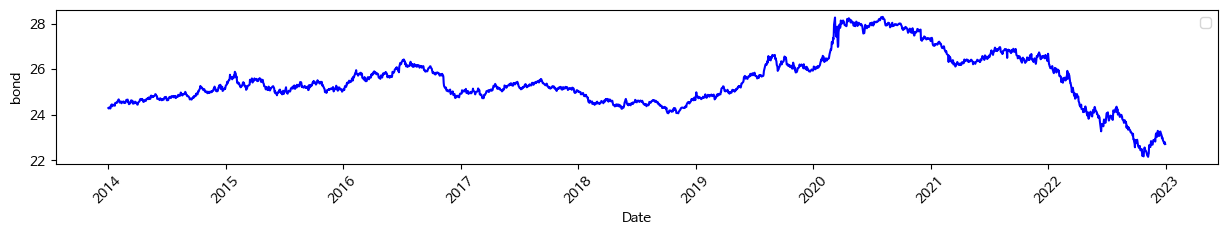

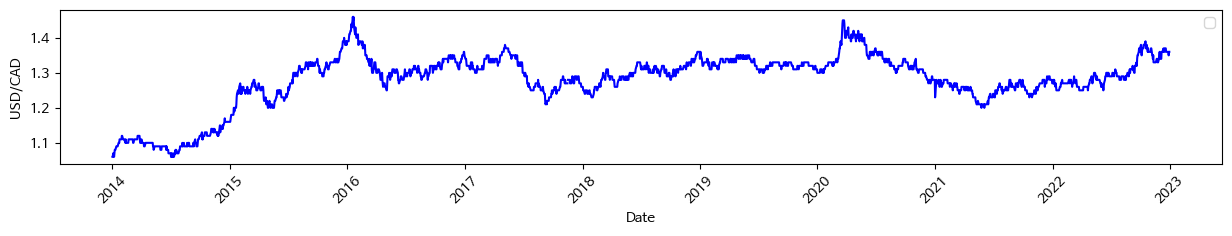

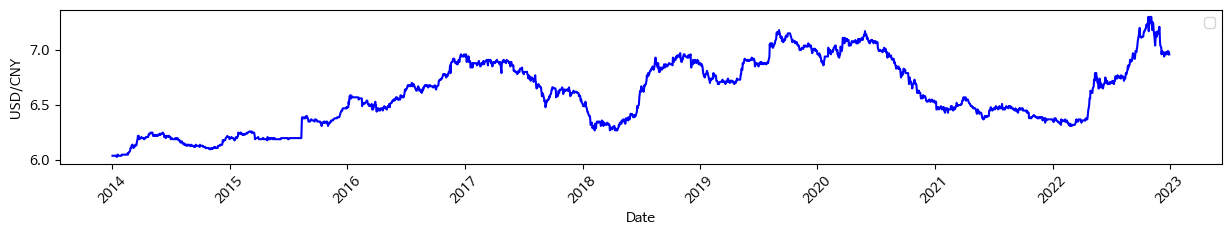

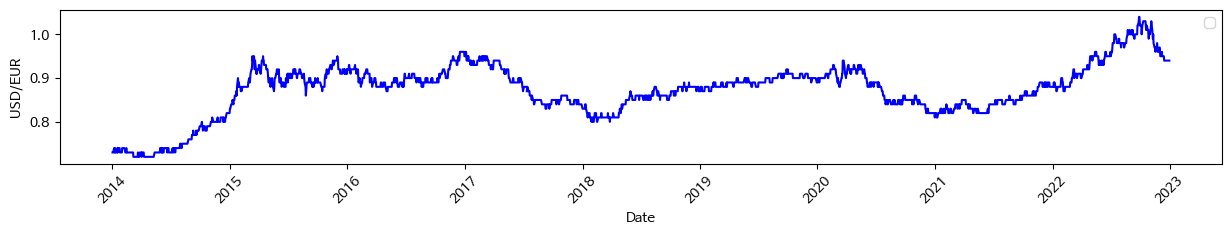

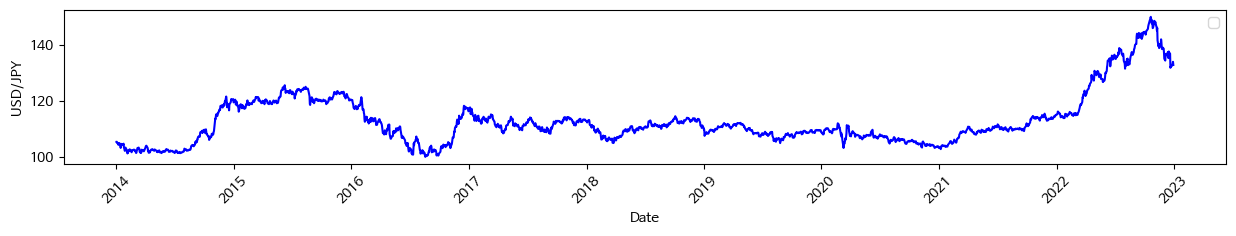

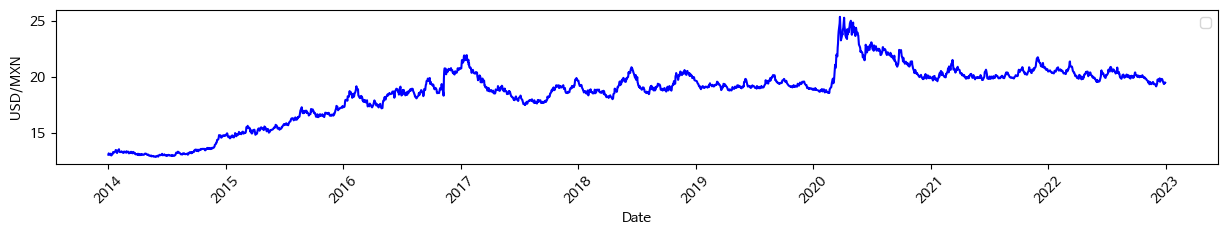

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 2))
plt.plot(ETF["Date"], ETF["ETF"], color='red')
plt.xlabel('Date')
plt.ylabel('ETF')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(15, 2))
plt.plot(gold["Date"], gold["gold"], color='blue')
plt.xlabel('Date')
plt.ylabel('gold')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(15, 2))
plt.plot(oil["Date"], oil["oil"], color='blue')
plt.xlabel('Date')
plt.ylabel('oil')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(15, 2))
plt.plot(bond["Date"], bond["bond"], color='blue')
plt.xlabel('Date')
plt.ylabel('bond')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(15, 2))
plt.plot(cad["Date"], cad["cad"], color='blue')
plt.xlabel('Date')
plt.ylabel('USD/CAD')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(15, 2))
plt.plot(cny["Date"], cny["cny"], color='blue')
plt.xlabel('Date')
plt.ylabel('USD/CNY')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(15, 2))
plt.plot(eur["Date"], eur["eur"], color='blue')
plt.xlabel('Date')
plt.ylabel('USD/EUR')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(15, 2))
plt.plot(jpy["Date"], jpy["jpy"], color='blue')
plt.xlabel('Date')
plt.ylabel('USD/JPY')
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(15, 2))
plt.plot(mxn["Date"], mxn["mxn"], color='blue')
plt.xlabel('Date')
plt.ylabel('USD/MXN')
plt.xticks(rotation=45)
plt.legend()
plt.show()